# <font color = "red">Verificando Relevância das palavras e os Collocations | Verificando TF-IDF

Nesta etapa irei verificar os seguintes fatores:

- Palavras mais relevantes nas reclamações com a NuBank
- Comparativo das palavras relevantes com outras instituições
- Verificarei os Bigramas, Trigramas e N-grams

-------

In [1]:
import re
import numpy as np
import pandas as pd

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import sent_tokenize, word_tokenize

In [6]:
# Importação dos dados
dados = pd.read_csv('/Projetos Pessoais/DataScience/PLN_Text_Analysis/data/dados_Frequency.csv',
                       sep =',')

In [7]:
dados_Nubank = dados[dados['Empresa'] == 'Nubank']

In [11]:
dados_Nubank.head(5)

,Empresa,Relato_Lematizao_SW
1,Nubank,"['pagamento', 'negociacao']"
2,Nubank,"['exclusao', 'nome', 'retirar', 'negativacao',..."
4,Nubank,"['gostar', 'reclamar', 'sobre', 'dívida', 'que..."
6,Nubank,"['acordo', 'pagamento', 'dívida', '.', 'tentar..."
8,Nubank,"['reclamaçãor', 'nubank', 'gostar', 'registrar..."


In [13]:
dados_Nubank.shape


(484, 2)

In [15]:
# Colocando todos os comentários dentro de uma lista

lista_comentarios = [palavra for palavra in dados_Nubank.Relato_Lematizao_SW.values]

In [25]:
lista_comentarios[0]

"['pagamento', 'negociacao']"

In [14]:
dados_Nubank.Relato_Lematizao_SW.values

array(["['pagamento', 'negociacao']",
       "['exclusao', 'nome', 'retirar', 'negativacao', 'nome', 'spcserasa']",
       "['gostar', 'reclamar', 'sobre', 'dívida', 'querer', 'constar', 'nome', '.', 'paguei', 'nome', 'ainda', 'sujo']",
       "['acordo', 'pagamento', 'dívida', '.', 'tentar', 'fazer', 'financiamento', 'imóvel', 'liberar', 'nome', 'constar', 'prejuízo', 'Banco', 'central', 'registrato', '.', 'nome', 'precisar', 'retirar', 'imediatamente']",
       "['reclamaçãor', 'nubank', 'gostar', 'registrar', 'insatisfação', 'instituição', 'financeiro', '.', 'juro', 'praticar', 'desrespeito', 'consumidor', '.', 'dívida', 'quase', 'ano', 'aposentar', 'ano', 'receber', 'salário', 'mínimo', 'valor', 'r', 'ocasião', 'cartão', 'renda', 'informal', 'durante', 'pandemia', 'perdi', 'valor', 'sempre', 'paguei', 'fatura', 'sempre', 'valor', 'acima', 'total', 'fatura', '.', 'infelizmente', 'problema', 'grave', 'saúde', 'dinheiro', 'sobrar', 'usar', 'cartão', 'crédito', 'vir', 'pagar', 'fatura'

Tópico #1:
descritivo, preciso, evolução, dívida, divido, média, percebo, abusivo, juro, acima
Tópico #2:
juro, dívida, valor, banco, pagar, nome, cartão, abusivo, acordo, crédito
Tópico #3:
cobrança, indique, serviço, valor, data, verifiquei, extrato, reconhecer, corrente, contar


C:\Users\alyss\AppData\Local\Temp\ipykernel_15336\1261925419.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=topic_df, ci=None)


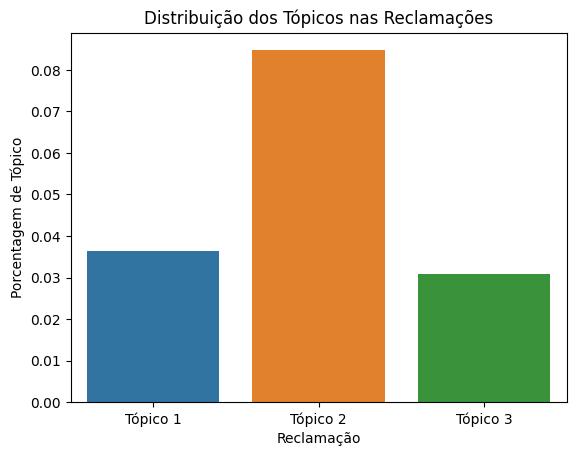

In [59]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns


# Passo 1: Transformar as listas de palavras em um formato de texto
# dados['Relato'] = dados['Relato_Lematizao_SW'].apply(lambda x: ' '.join(x))

# Passo 2: Vetorizar os relatos usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dados['Relato_Lematizao_SW'])

# Passo 3: Aplicar o modelo NMF para análise de tópicos
n_topics = 3  # Defina o número de tópicos que você quer
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X)

# Passo 4: Exibir as palavras mais representativas de cada tópico
terms = vectorizer.get_feature_names_out()

def display_topics(model, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Tópico #{topic_idx + 1}:")
        print(", ".join([terms[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Exibir as 10 palavras mais importantes por tópico
display_topics(nmf_model, 10)

# Passo 5: Visualizar a distribuição dos tópicos nas reclamações
topic_values = nmf_model.transform(X)

# Criar um DataFrame para facilitar a visualização
topic_df = pd.DataFrame(topic_values, columns=[f"Tópico {i+1}" for i in range(n_topics)])

# Visualizar as distribuições de tópicos
sns.barplot(data=topic_df, ci=None)
plt.title("Distribuição dos Tópicos nas Reclamações")
plt.ylabel("Porcentagem de Tópico")
plt.xlabel("Reclamação")
plt.show()

,Tópico 1,Tópico 2,Tópico 3
0,0.000000,0.021457,0.000000
1,0.000000,0.044478,0.000000
2,0.005738,0.115813,0.000000
3,0.000000,0.149288,0.000000
4,0.000000,0.145506,0.000553
...,...,...,...
479,0.000000,0.086098,0.009416
480,0.000000,0.083127,0.000000
481,0.000000,0.021710,0.006659
482,0.000000,0.092336,0.021414


In [61]:
!pip install wordcloud

     -------------------------------------- 300.4/300.4 kB 3.1 MB/s eta 0:00:00


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Supondo que 'seu_texto_lemmatizado' seja a lista de textos já lematizados e prontos
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')  # Ajuste para português se necessário
X = vectorizer.fit_transform(seu_texto_lemmatizado)  # seu_texto_lemmatizado é o corpus de texto

# Obter os trigramas e suas frequências
trigrams = vectorizer.get_feature_names_out()
trigram_freq = X.sum(axis=0).A1  # Frequência dos trigramas
trigram_freq_dict = dict(zip(trigrams, trigram_freq))

# Visualizar os trigramas mais frequentes
sorted_trigrams = sorted(trigram_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Exibir os top 10 trigramas
for trigram, freq in sorted_trigrams[:10]:
    print(f'{trigram}: {freq}')

NameError: name 'seu_texto_lemmatizado' is not defined

In [57]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Preparar dados (transformar o texto em uma matriz de documentos x termos)
vectorizer = CountVectorizer(stop_words='english')  # Remover stopwords comuns em inglês (ajustar para português)
X = vectorizer.fit_transform(seu_texto)  # seu_texto é o corpus de textos processados

# Ajustar o número de tópicos
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Ajustando para 5 tópicos
lda.fit(X)

# Visualizar as palavras associadas a cada tópico
for i, topic in enumerate(lda.components_):
    print(f"Tópico #{i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])  # As 10 palavras mais importantes para o tópico

NameError: name 'seu_texto' is not defined

In [45]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("neuralmind/roberta-large-portuguese")
model = AutoModel.from_pretrained("neuralmind/roberta-large-portuguese")

def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

OSError: neuralmind/roberta-large-portuguese is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [33]:
dados_frases = []
dados_palavras = []

def preenche_listas(text):
 dados_frases.append(text)
 for palavra in text:
  dados_palavras.append(palavra)

In [34]:
dados

,Empresa,Relato_Lematizao_SW
0,Caixa Econômica Federal,"['crédito', 'fazer', 'empréstimo', 'nome', 'en..."
1,Nubank,"['pagamento', 'negociacao']"
2,Nubank,"['exclusao', 'nome', 'retirar', 'negativacao',..."
3,C6 Bank,"['cliente', 'bank', 'tempo', 'sempre', 'manter..."
4,Nubank,"['gostar', 'reclamar', 'sobre', 'dívida', 'que..."
...,...,...
1915,Banco Itaú Unibanco,"['solicitar', 'retirada', 'restrição', 'aponta..."
1916,Banco Itaú Unibanco,"['dificuldade', 'redefinir', 'senha', 'acesso'..."
1917,C6 Bank,"['gostar', 'tirar', 'apontamento', 'registrato..."
1918,Banco Bradesco,"['cliente', 'banco', 'bradesco', 'possuor', 'c..."


In [35]:
dados['Relato_Lematizao_SW'].map(lambda x: preenche_listas(x))

0       None
1       None
2       None
3       None
4       None
        ... 
1915    None
1916    None
1917    None
1918    None
1919    None
Name: Relato_Lematizao_SW, Length: 1920, dtype: object

In [40]:
type(dados_frases[0])


str

In [41]:
type(dados_frases)


list

In [42]:
dados_palavras

['[',
 "'",
 'c',
 'r',
 'é',
 'd',
 'i',
 't',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'f',
 'a',
 'z',
 'e',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'e',
 'm',
 'p',
 'r',
 'é',
 's',
 't',
 'i',
 'm',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'n',
 'o',
 'm',
 'e',
 "'",
 ',',
 ' ',
 "'",
 'e',
 'n',
 'c',
 'o',
 'n',
 't',
 'r',
 'a',
 'r',
 "'",
 ',',
 ' ',
 "'",
 's',
 'e',
 'r',
 'a',
 's',
 'a',
 "'",
 ',',
 ' ',
 "'",
 's',
 'i',
 "'",
 ',',
 ' ',
 "'",
 'e',
 'm',
 'p',
 'r',
 'é',
 's',
 't',
 'i',
 'm',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'a',
 'j',
 'u',
 'd',
 'a',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'c',
 'o',
 'l',
 'o',
 'c',
 'a',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'o',
 'r',
 'd',
 'e',
 'm',
 "'",
 ',',
 ' ',
 "'",
 'f',
 'i',
 'n',
 'a',
 'n',
 'c',
 'i',
 'a',
 'm',
 'e',
 'n',
 't',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'c',
 'l',
 't',
 "'",
 ',',
 ' ',
 "'",
 'g',
 'a',
 'n',
 'h',
 'a',
 'r',
 "'",
 ',',
 ' ',
 "'",
 's',
 'a',
 'l',
 'á',
 'r',
 'i',
 'o',
 "'",
 ',',
 ' ',
 "'",
 'm',
 'í',
 'n',
 'i',
 'm'